In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from yellowbrick.classifier import ConfusionMatrix

In [ ]:
dataset = pd.read_csv('data/insurance.csv', keep_default_na=False)

In [3]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)
# dataset = dataset.drop(['ThisCarDam'], axis=1)
# dataset = dataset.drop(['Accident'], axis=1)
# dataset = dataset.drop(['Unnamed: 0', 'ThisCarDam', 'Accident'], axis=1)
dataset.head()

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many


In [4]:
print(dataset.isnull().sum())

GoodStudent     0
Age             0
SocioEcon       0
RiskAversion    0
VehicleYear     0
ThisCarDam      0
RuggedAuto      0
Accident        0
MakeModel       0
DrivQuality     0
Mileage         0
Antilock        0
DrivingSkill    0
SeniorTrain     0
ThisCarCost     0
Theft           0
CarValue        0
HomeBase        0
AntiTheft       0
PropCost        0
OtherCarCost    0
OtherCar        0
MedCost         0
Cushioning      0
Airbag          0
ILiCost         0
DrivHist        0
dtype: int64


In [5]:
y = dataset.iloc[:,7].values
X = dataset.drop(dataset.columns[7], axis=1).values

In [6]:
X

array([[False, 'Adult', 'Prole', ..., False, 'Thousand', 'Many'],
       [False, 'Senior', 'Prole', ..., True, 'Thousand', 'Zero'],
       [False, 'Senior', 'UpperMiddle', ..., True, 'Thousand', 'One'],
       ...,
       [False, 'Senior', 'UpperMiddle', ..., True, 'Thousand', 'Zero'],
       [False, 'Adult', 'Middle', ..., True, 'Thousand', 'Zero'],
       [False, 'Adult', 'Middle', ..., True, 'Thousand', 'Zero']],
      shape=(20000, 26), dtype=object)

In [7]:
labelencoder = LabelEncoder()

for i in range(X.shape[1]):
    if X[:,i].dtype == 'object':
        X[:,i] = labelencoder.fit_transform(X[:,i])

In [8]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [9]:
model = GaussianNB()
model.fit(X_training, y_training)

,priors,None
,var_smoothing,1e-09


In [13]:
predictions = model.predict(X_test)

In [14]:
predictions

array(['Moderate', 'Mild', 'Moderate', ..., 'None', 'Mild', 'None'],
      shape=(6000,), dtype='<U8')

In [16]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-Score: {f1}')

Accuracy: 0.857
Precision: 0.919107010136158
Recall: 0.857
F1-Score: 0.8343753099843555


In [17]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

        Mild       0.89      0.70      0.79       570
    Moderate       0.38      0.91      0.54       488
        None       0.98      1.00      0.99      4253
      Severe       0.96      0.07      0.13       689

    accuracy                           0.86      6000
   macro avg       0.80      0.67      0.61      6000
weighted avg       0.92      0.86      0.83      6000



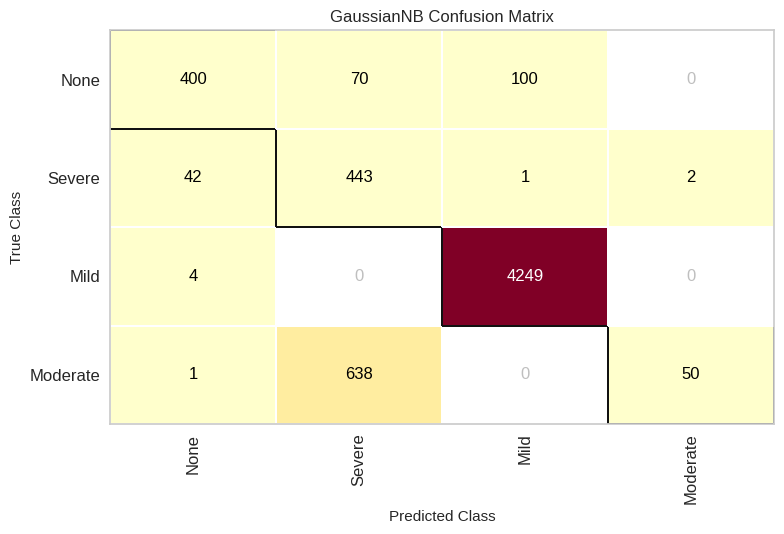

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [18]:
confusion = ConfusionMatrix(model, classes=['None', 'Severe', 'Mild', 'Moderate'])
confusion.fit(X_training, y_training)
confusion.score(X_test, y_test)
confusion.poof()